In [723]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [724]:
hidden_size = 3

In [725]:
# cudaが使えるか確認
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [726]:
prm_data_path = f'../data storage/prm_data_L16_FCNN_Nh{hidden_size}.pth'

In [727]:
prm = torch.load(prm_data_path, map_location=torch.device('cpu'))
prm

OrderedDict([('fc1.weight',
              tensor([[ 1.4975e-01,  8.1673e-05,  5.3066e-03,  1.9348e-02,  5.0282e-03,
                        2.2228e-02,  2.7684e-02,  5.8573e-02,  5.9415e-02, -2.2712e-03,
                        6.8593e-02,  1.3348e-01,  6.3104e-02,  6.6427e-02, -5.3700e-02,
                       -2.3448e-02,  8.1990e-02,  5.1481e-02,  7.0892e-02,  1.1330e-01,
                        8.6083e-02,  2.1339e-02,  2.7997e-02, -5.8326e-02, -3.6411e-03,
                       -4.7184e-03,  3.3114e-02, -2.2866e-02, -1.1133e-02,  3.1831e-02,
                        1.3424e-01,  1.0857e-01,  4.2238e-02,  6.6753e-02,  1.2907e-01,
                        2.0228e-02,  1.1617e-01,  3.9185e-02,  6.9098e-02,  4.0282e-03,
                        3.8148e-02,  2.9437e-03, -2.4230e-02,  6.7831e-02,  3.9793e-02,
                       -6.7576e-02,  8.7245e-03, -2.4675e-02, -1.7515e-02,  9.4750e-02,
                        4.9816e-02, -3.1911e-02,  2.8428e-02,  6.8147e-02, -1.0062e-02,
    

In [728]:
fc2_weight = prm['fc2.weight']
fc2_weight

tensor([[-2.8842e+00, -2.8421e+00,  1.2728e+00],
        [-2.7754e+00, -2.2495e+00,  1.0695e+00],
        [-1.9358e+00, -1.7573e+00,  1.6223e+00],
        [-2.0643e+00, -1.7007e+00,  1.3790e+00],
        [-1.6179e+00, -1.5461e+00,  1.1154e+00],
        [-1.7160e+00, -1.6603e+00,  6.8848e-01],
        [-1.0365e+00, -1.3663e+00,  6.8218e-01],
        [-1.1773e+00, -9.8758e-01, -8.4585e-01],
        [ 3.0478e-02,  2.2981e-01, -2.6522e+00],
        [-3.1418e-01,  4.5572e-04, -3.8723e+00],
        [ 1.0011e+00,  5.0962e-01, -3.2691e+00],
        [ 5.9885e-01,  5.7656e-01, -4.3186e+00],
        [ 6.6984e-01,  2.1998e-01, -3.2694e+00],
        [ 7.5543e-01,  4.2138e-01, -3.8530e+00],
        [ 3.8389e-01,  1.9885e-01, -4.3760e+00],
        [ 8.5406e-01,  2.1271e-01, -3.4249e+00],
        [ 3.0467e-01,  6.4531e-01, -3.4409e+00],
        [ 1.0462e+00,  4.8797e-01, -3.4227e+00],
        [-4.4956e-01,  1.2300e+00, -3.9539e+00],
        [ 8.0326e-01,  7.2528e-01, -4.2390e+00]])

In [729]:
fc2_weight.size()

torch.Size([20, 3])

In [730]:
# NumPy配列に変換
fc2_weight_np = fc2_weight.cpu().numpy()
# データを転置して
fc2_weight_np_square = fc2_weight_np.T

In [731]:
fc2_weight_np_square

array([[-2.8842485e+00, -2.7754364e+00, -1.9357951e+00, -2.0642853e+00,
        -1.6179332e+00, -1.7159970e+00, -1.0364552e+00, -1.1772895e+00,
         3.0477773e-02, -3.1418303e-01,  1.0011111e+00,  5.9884655e-01,
         6.6983843e-01,  7.5542784e-01,  3.8388568e-01,  8.5405982e-01,
         3.0467257e-01,  1.0462276e+00, -4.4956470e-01,  8.0326295e-01],
       [-2.8421485e+00, -2.2495100e+00, -1.7573344e+00, -1.7007327e+00,
        -1.5461458e+00, -1.6603187e+00, -1.3663400e+00, -9.8758370e-01,
         2.2981498e-01,  4.5572099e-04,  5.0962192e-01,  5.7655579e-01,
         2.1997705e-01,  4.2138058e-01,  1.9884637e-01,  2.1270840e-01,
         6.4531136e-01,  4.8796618e-01,  1.2299933e+00,  7.2528130e-01],
       [ 1.2727653e+00,  1.0695472e+00,  1.6223038e+00,  1.3789848e+00,
         1.1154298e+00,  6.8848127e-01,  6.8218321e-01, -8.4585285e-01,
        -2.6521623e+00, -3.8723321e+00, -3.2690539e+00, -4.3185697e+00,
        -3.2694311e+00, -3.8530064e+00, -4.3760166e+00, -3.424

In [732]:
fc2_weight_np_square.shape

(3, 20)

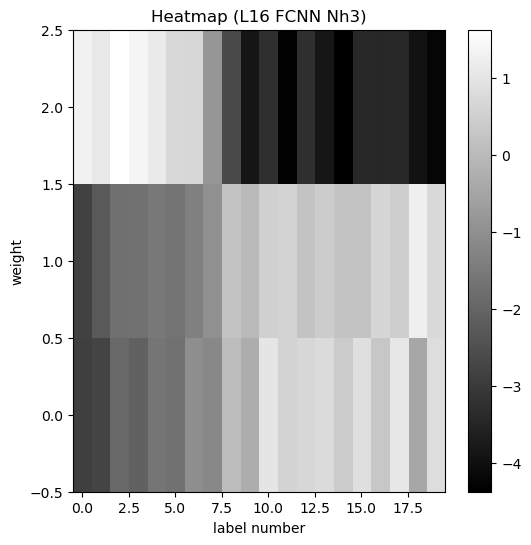

In [733]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc2_weight_np_square, cmap='gray', interpolation='nearest', origin='lower', aspect='auto')
plt.colorbar()
plt.title('Heatmap (L16 FCNN Nh3)')


# x軸とy軸に名前を付ける
plt.ylabel('weight')
plt.xlabel('label number')
# 図をファイルとして保存
plt.savefig(f'../image/L16_FCNN_Nh{hidden_size}_wight.png')
plt.show()

In [734]:
fc2_weight_np_square_sum = np.sum(fc2_weight_np_square, axis=0)
fc2_weight_np_square_sum

array([-4.453632 , -3.955399 , -2.0708256, -2.386033 , -2.0486493,
       -2.6878343, -1.720612 , -3.010726 , -2.3918695, -4.1860595,
       -1.7583208, -3.1431673, -2.3796158, -2.676198 , -3.7932844,
       -2.358128 , -2.4909344, -1.8885527, -3.1735063, -2.7104247],
      dtype=float32)

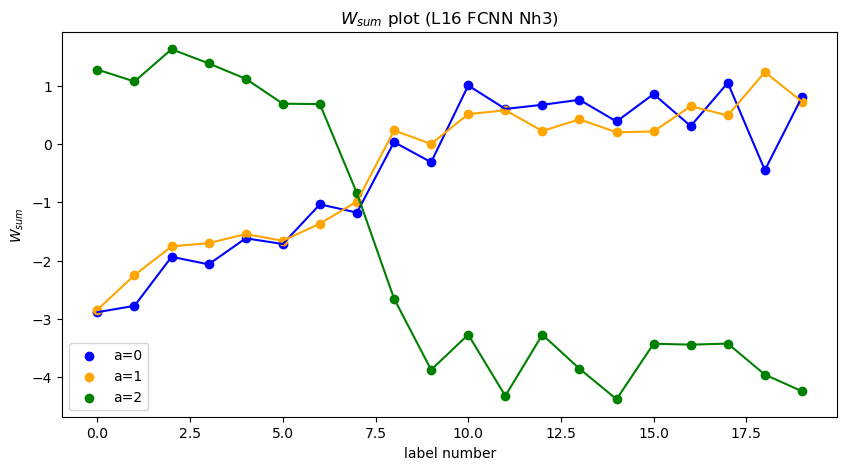

In [735]:
import numpy as np
import matplotlib.pyplot as plt

# データ
x = np.arange(len(fc2_weight_np_square[1]))
y0 = fc2_weight_np_square[0]
y1 = fc2_weight_np_square[1]
y2 = fc2_weight_np_square[2]

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y0, color='blue', label='a=0')
plt.scatter(x, y1, color='orange', label='a=1')
plt.scatter(x, y2, color='green', label='a=2')
plt.plot(x, y0, color='blue')
plt.plot(x, y1, color='orange')
plt.plot(x, y2, color='green')
plt.title('$W_{sum}$ plot (L16 FCNN Nh3)')
plt.xlabel('label number')
plt.ylabel('$W_{sum}$')

# 図をファイルとして保存
plt.savefig(f'../image/L16_FCNN_Nh{hidden_size}_weight_plot.png')
plt.legend()  # 凡例を表示
plt.show()

第1層の出力と磁化の相関図を作成

In [736]:
# 磁化を計算
def magnetization(state):
   return np.mean(state)

In [737]:
import io
import pickle
      
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)

In [738]:
# ファイルの相対パスを指定
file_path = '../data storage/Ising_data_L16_v2.pkl'

if torch.cuda.is_available():
    with open(file_path, 'rb') as file:
        loaded_data = pickle.load(file)
else:
    with open(file_path, 'rb') as file:
        loaded_data = CPU_Unpickler(file).load()
        
# 読み込んだデータを個々の変数に分割
spin_data, label_data = loaded_data

In [739]:
# # 磁化を計算
# def magnetization(state):
#     return np.mean(state)

# for i in range(len(spin_data)):
#     mag = magnetization(spin_data[i])
#     if mag > 0:
#         spin_data[i] *= -1

In [740]:
spin_data[0].shape

(16, 16)

In [741]:
num_spin_data = len(spin_data)
flat_spin_data = [spin_data[i].flatten() for i in range(num_spin_data)]
flat_spin_data[0].shape

(256,)

In [742]:
fc1_weight = prm['fc1.weight'].cpu().numpy()
len(fc1_weight)


3

In [743]:
fc1_bias = prm['fc1.bias'].cpu().numpy()
fc1_bias

array([-2.5461679, -2.4360743,  2.977125 ], dtype=float32)

In [744]:
# 内積
output_data_0 = []
output_data_1 = []
output_data_2 = []
mag_data = []

for i in range(num_spin_data):
    dot_product_0 = np.dot(flat_spin_data[i], fc1_weight[0]) + fc1_bias[0]
    output_data_0.append(dot_product_0)
    dot_product_1 = np.dot(flat_spin_data[i], fc1_weight[1]) + fc1_bias[1]
    output_data_1.append(dot_product_1)
    dot_product_2 = np.dot(flat_spin_data[i], fc1_weight[2]) + fc1_bias[2]
    output_data_2.append(dot_product_2)
    mag = magnetization(flat_spin_data[i])
    mag_data.append(mag)

In [745]:
len(output_data_0)

40000

In [746]:
len(mag_data)

40000

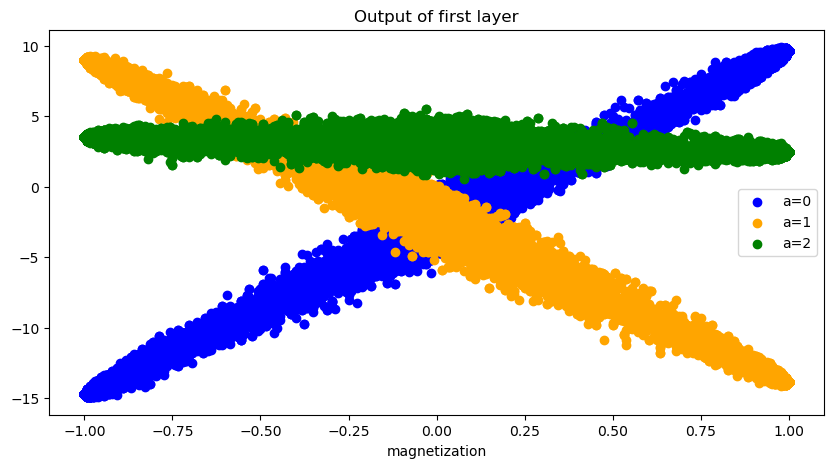

In [747]:
# データ
x = mag_data
y0 = output_data_0
y1 = output_data_1
y2 = output_data_2

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y0, color='blue', label='a=0')
plt.scatter(x, y1, color='orange', label='a=1')
plt.scatter(x, y2, color='green', label='a=2')


plt.title('Output of first layer')
plt.xlabel('magnetization')

# 図をファイルとして保存
plt.savefig('../image/L16_FCNN_Nh3_output.png')
plt.legend()  # 凡例を表示
plt.show()

学習済みモデルからプロットするver

In [748]:
import torch.nn as nn
import torch.nn.functional as F

class FCNN2(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FCNN2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size, bias=True)
        self.fc2 = nn.Linear(hidden_size, output_size, bias=True)
        self.flatten = nn.Flatten()

    def forward(self, x):
        x = self.flatten(x)
        return x

In [749]:
# cudaが使えるか確認
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [750]:
input_size = 16*16
hidden_size = 3
output_size = 20
model = FCNN2(input_size, hidden_size, output_size).to(device)

model.load_state_dict(torch.load(prm_data_path), strict=False)
print(model.state_dict())

OrderedDict([('fc1.weight', tensor([[ 1.4975e-01,  8.1673e-05,  5.3066e-03,  1.9348e-02,  5.0282e-03,
          2.2228e-02,  2.7684e-02,  5.8573e-02,  5.9415e-02, -2.2712e-03,
          6.8593e-02,  1.3348e-01,  6.3104e-02,  6.6427e-02, -5.3700e-02,
         -2.3448e-02,  8.1990e-02,  5.1481e-02,  7.0892e-02,  1.1330e-01,
          8.6083e-02,  2.1339e-02,  2.7997e-02, -5.8326e-02, -3.6411e-03,
         -4.7184e-03,  3.3114e-02, -2.2866e-02, -1.1133e-02,  3.1831e-02,
          1.3424e-01,  1.0857e-01,  4.2238e-02,  6.6753e-02,  1.2907e-01,
          2.0228e-02,  1.1617e-01,  3.9185e-02,  6.9098e-02,  4.0282e-03,
          3.8148e-02,  2.9437e-03, -2.4230e-02,  6.7831e-02,  3.9793e-02,
         -6.7576e-02,  8.7245e-03, -2.4675e-02, -1.7515e-02,  9.4750e-02,
          4.9816e-02, -3.1911e-02,  2.8428e-02,  6.8147e-02, -1.0062e-02,
          9.7340e-03,  4.6433e-02,  8.2715e-02,  3.1074e-02,  3.2938e-02,
          6.7453e-03, -2.9958e-02,  3.8157e-02,  4.6713e-02,  1.5114e-01,
          

In [751]:
# 磁化を計算
def magnetization(state):
   return np.mean(state)

In [752]:
import io
import pickle
      
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)
        
# ファイルの相対パスを指定
file_path = '../data storage/Ising_data_L16.pkl'

if torch.cuda.is_available():
    with open(file_path, 'rb') as file:
        loaded_data = pickle.load(file)
else:
    with open(file_path, 'rb') as file:
        loaded_data = CPU_Unpickler(file).load()
        
# 読み込んだデータを個々の変数に分割
spin_data, label_data = loaded_data

In [753]:
# NumPy ndarrayをPyTorch Tensorに変換
spin_data_tensor = [torch.from_numpy(i).type(torch.float32) for i in spin_data]
spin_data_tensor[0].size()

torch.Size([16, 16])

In [754]:
output = [np.squeeze(model(spin_data_tensor[i]).detach().numpy()) for i in range(len(spin_data_tensor))]

In [755]:
a = torch.squeeze(model(spin_data_tensor[1]))
b = [a[i].detach().numpy() for i in range(3)]
b[0]

array([-1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,
       -1., -1.,  1.], dtype=float32)

In [756]:
num_spin_data = len(spin_data)
flat_spin_data = [spin_data[i].flatten() for i in range(num_spin_data)]

In [757]:
fc0_weight = model.state_dict()['fc1.weight'].cpu().numpy()
fc0_bias = model.state_dict()['fc1.bias'].cpu().numpy()

In [758]:
# 内積
output_data_0 = []
output_data_1 = []
output_data_2 = []
mag_data = []

for i in range(num_spin_data):
    dot_product_0 = np.dot(flat_spin_data[i], fc1_weight[0]) + fc1_bias[0]
    output_data_0.append(dot_product_0)
    dot_product_1 = np.dot(flat_spin_data[i], fc1_weight[1]) + fc1_bias[1]
    output_data_1.append(dot_product_1)
    dot_product_2 = np.dot(flat_spin_data[i], fc1_weight[2]) + fc1_bias[2]
    output_data_2.append(dot_product_2)
    mag = magnetization(flat_spin_data[i])
    mag_data.append(mag)

In [759]:
output_data_0

[-0.8737762816017494,
 -3.273709250963293,
 -4.856612663134001,
 -2.993630237877369,
 -0.7423190101981163,
 -4.298734414856881,
 -1.1129628154449165,
 -2.560574646689929,
 -3.2711335672065616,
 -3.072791941696778,
 -4.2232478654477745,
 -2.940632271231152,
 -4.477399388328195,
 -2.977822368964553,
 -3.001101345405914,
 -0.7302224121522158,
 -3.699037599377334,
 -2.1680751324165612,
 -3.2445013418328017,
 -1.7056889642262831,
 -1.7962002948625013,
 -0.6775388019159436,
 -4.252537173568271,
 -4.518497741082683,
 -2.1399405484553427,
 -2.163284547626972,
 -1.497282249853015,
 -1.6623827988514677,
 -3.5237615717342123,
 -2.054184437613003,
 -2.908354299957864,
 -3.4602077427553013,
 0.6809836179018021,
 -0.9964337147539482,
 -4.2706924030790105,
 -3.2052248142426834,
 -1.6149063032353297,
 -2.034997087204829,
 -1.9983004676178098,
 -2.390694218571298,
 -4.828455812064931,
 -3.2965470660710707,
 -3.123392271460034,
 -3.291018247255124,
 -3.918089786777273,
 -1.0238634260604158,
 -4.22246588

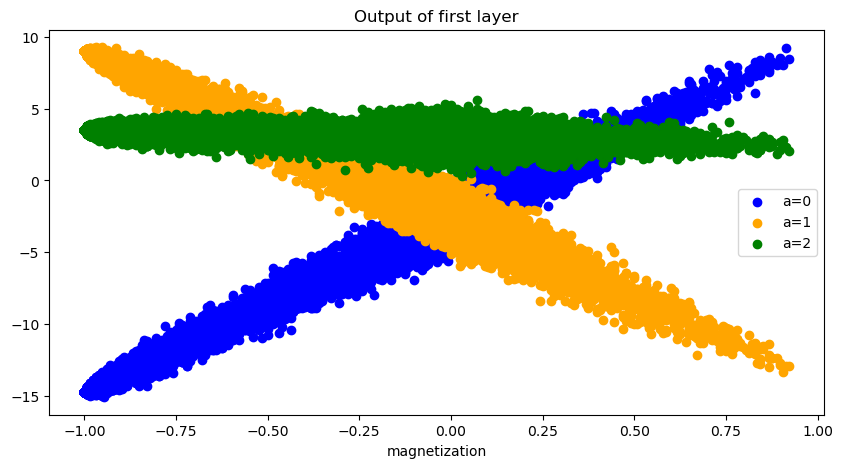

In [760]:
# データ
x = mag_data
y0 = output_data_0
y1 = output_data_1
y2 = output_data_2

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y0, color='blue', label='a=0')
plt.scatter(x, y1, color='orange', label='a=1')
plt.scatter(x, y2, color='green', label='a=2')


plt.title('Output of first layer')
plt.xlabel('magnetization')

# 図をファイルとして保存
# plt.savefig('../image/L16_CNN_Nh3_output.png')
plt.legend()  # 凡例を表示
plt.show()